# Create X and y sets

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

Plotting them

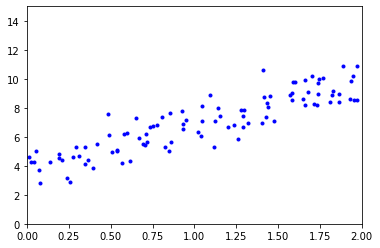

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, "b.")
plt.axis([0,2, 0, 15])
plt.show()

# Implement The Learning Algorithm

Theta has one 'weight' for every X in the row (so 1) as well as a bias. So we need to add an extra column of 1s into X for the matrix multipliaction

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
print(X_b[0:5])

[[1.         0.6946124 ]
 [1.         0.92775658]
 [1.         0.57711285]
 [1.         1.95064094]
 [1.         1.82710302]]


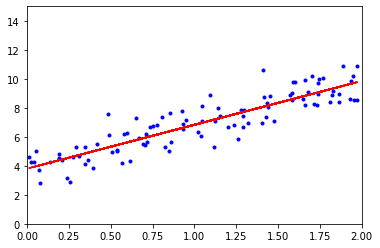

In [4]:
eta = 0.1 # Learning Rage
n_iterations = 1000
m = 100

# Randomly initialize theta for the linear regression
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot((X_b.dot(theta) - y))
    theta = theta - eta * gradients

plt.plot(X, y, "b.")
plt.plot(X, X_b.dot(theta), "r-")
plt.axis([0, 2, 0, 15])
plt.show()

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Colocations handled automatically by placer.
Epoch 0 MSE= 55.047714
Epoch 100 MSE= 0.797345
Epoch 200 MSE= 0.79655594
Epoch 300 MSE= 0.7965542
Epoch 400 MSE= 0.79655427
Epoch 500 MSE= 0.7965541
Epoch 600 MSE= 0.7965541
Epoch 700 MSE= 0.7965541
Epoch 800 MSE= 0.7965541
Epoch 900 MSE= 0.7965541
[[3.8043425]
 [3.024889 ]]


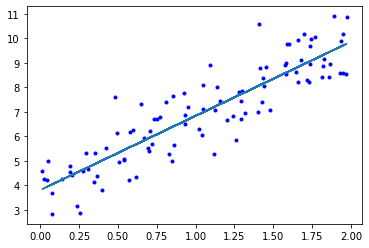

In [5]:
import tensorflow as tf
theta = np.random.randn(2, 1)
Xb = tf.constant(X_b, dtype=tf.float32, name="Xb")
yb = tf.constant(y, dtype=tf.float32, name="yb")
thetab = tf.Variable(theta, dtype=tf.float32, name="thetab")
y_predb = tf.matmul(Xb, thetab, name="predictionsb")
errorb = y_predb - yb
mseb = tf.reduce_mean(tf.square(errorb), name="mseb")
gradientsb = 2/m * tf.matmul(tf.transpose(Xb), errorb)

training_op = tf.assign(thetab, thetab - eta * gradientsb)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_iterations):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE=", mseb.eval())
        sess.run(training_op)
    
    best_thetab = thetab.eval()
    print(best_thetab)
    
    plt.plot(X, y, "b.")
    plt.plot(X, X_b.dot(best_thetab), )

# Now with Tensorflow

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
m, n = housing.data.shape

scaler = StandardScaler()
housing_data_scaled = scaler.fit_transform(housing.data)

housing_data_scaled_bias = np.c_[np.ones((m, 1)), housing_data_scaled]

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(housing_data_scaled_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
#gradients = 2/m * tf.matmul(tf.transpose(X), error)
# or using autodiff
gradients = tf.gradients(mse, [theta])[0]

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE = ", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE =  9.17173
Epoch 100 MSE =  0.8431967
Epoch 200 MSE =  0.67053366
Epoch 300 MSE =  0.630006
Epoch 400 MSE =  0.6019657
Epoch 500 MSE =  0.58152634
Epoch 600 MSE =  0.5665836
Epoch 700 MSE =  0.55563843
Epoch 800 MSE =  0.5476047
Epoch 900 MSE =  0.5416941


In [7]:
best_theta

array([[ 2.0685523 ],
       [ 0.8400481 ],
       [ 0.15887292],
       [-0.21384595],
       [ 0.23156737],
       [ 0.00995711],
       [-0.04294258],
       [-0.5976203 ],
       [-0.56603616]], dtype=float32)

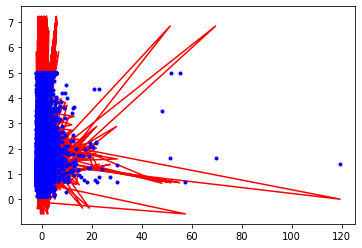

In [8]:
plt.plot(housing_data_scaled, housing_data_scaled_bias.dot(best_theta), "r-")
plt.plot(housing_data_scaled, housing.target, "b.")
plt.show()